# Project Name: Census Income Project


About Project: This data was extracted from the 1994 Census bureau database. The prediction task is to determine whether a person makes over $50K a year.

In [52]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [53]:
# Importing Dataset

ds= pd.read_csv("census_income.csv")
ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [54]:
df= pd.DataFrame(data= ds)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [55]:
df.shape

(32560, 15)

In [56]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [58]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [59]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations: Counts for all numerical columns indicates no null values present. There is large differences in min and max value and high Standard deviation present in capital_gain and capital_loss columns.

In [60]:
#Checking for Null values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observations: No null values are present in Dataset.

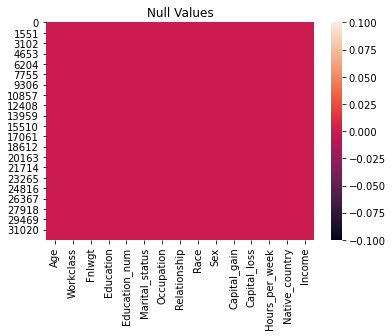

In [61]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Observations: No null values are present in Dataset.

# EDA

In [62]:
#Getting Unique Values for Object data type columns

for i in df.columns:
    if df[i].dtypes== 'object':
        print(str(i), ' : ', df[i].unique())
        print(df[i].value_counts())
        print()
        print()

Workclass  :  [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Education  :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education

Observations: For the columns Workclass, Occupation, Native_country we have unlnown value indicated by ?, we will replace it by using Mode. Also all values having space as first character that we need to remove first.

In [63]:
#Removing Space before characters

for i in df.columns:
    if df[i].dtypes== 'object':
        df[i]= df[i].str[1:100]

In [64]:
df['Workclass'].replace('?', 'Private', inplace=True)
df['Workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [65]:
df['Occupation'].replace('?', 'Prof-specialty', inplace=True)
df['Occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [66]:
df['Native_country'].replace('?', 'United-States', inplace=True)
df['Native_country'].value_counts()

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

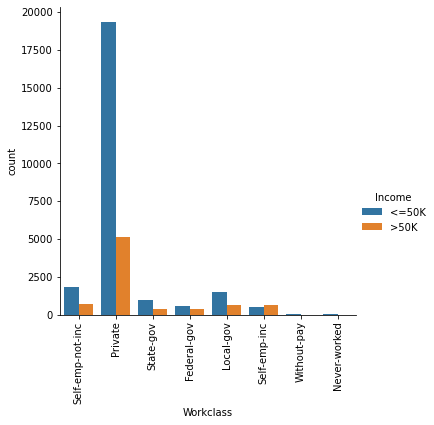

In [67]:
sns.catplot(x ="Workclass", hue ="Income", kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: Private class Population there is more count for income <=50K. But for class Self-emp-inc there is more rate of >50K income.

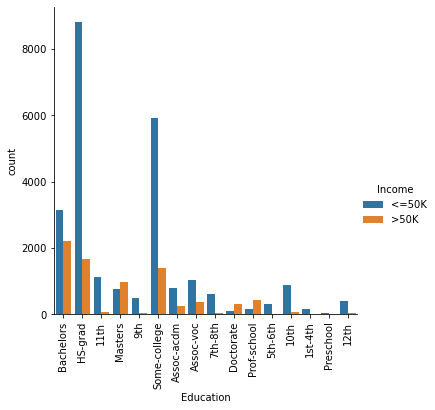

In [68]:
sns.catplot(x ="Education", hue ="Income", kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: There is highest population with HS-grad with income <=50K, where as for Doctorate and Prof-school having more rate of income >50K.

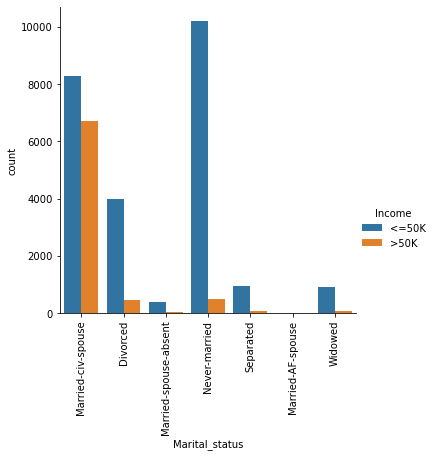

In [69]:
sns.catplot(x ="Marital_status", hue ="Income", kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: Rate of Never_married population with income <=50K is very high. Where as for Married_civ-spouse having highest rate with income >50K.

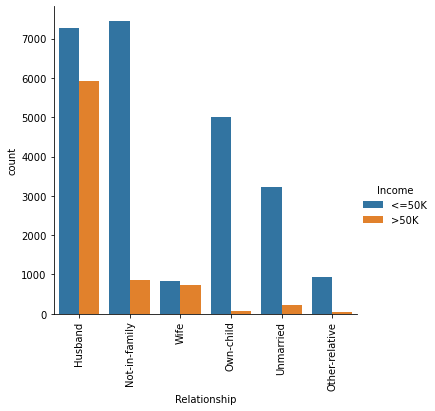

In [70]:
sns.catplot(x ="Relationship", hue ="Income", kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: Not-in-family population having highest rate with income <=50K. Where as for husband having highest rate with income >50K.

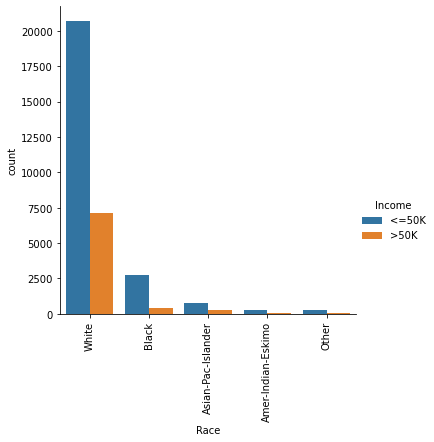

In [71]:
sns.catplot(x ="Race", hue ="Income", kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: There is more count of White race population with more rate of income is <=50K.

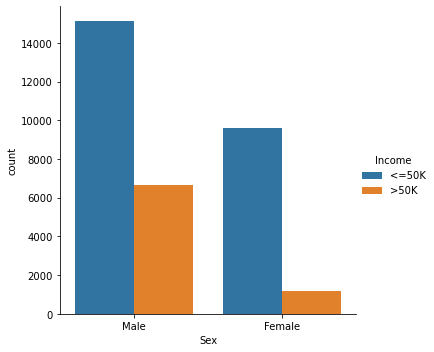

In [72]:
sns.catplot(x= 'Sex', hue= 'Income', kind= 'count', data= df)

Observations: There is more count of Male in population with more rate of income is <=50K.

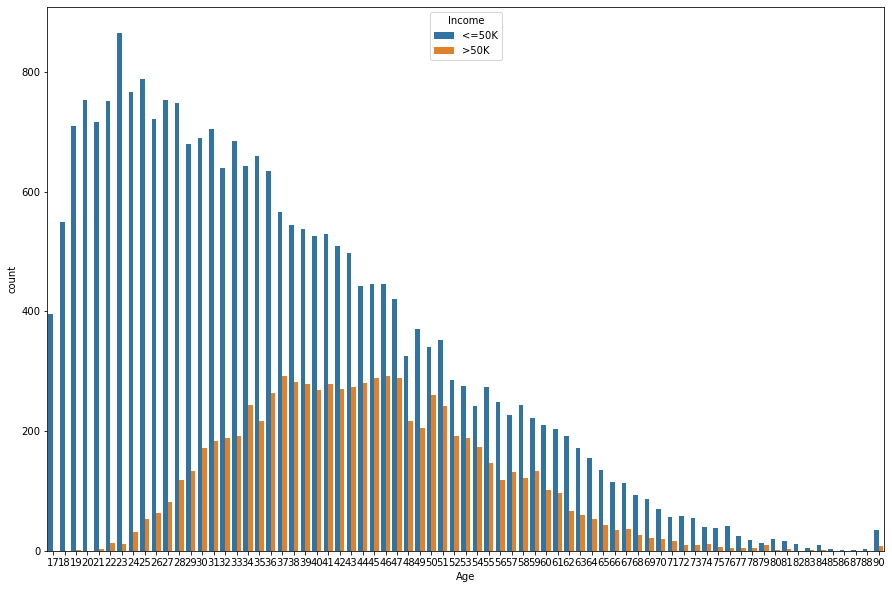

In [73]:
plt.subplots(figsize=(15,10))
sns.countplot('Age', hue= 'Income', data= df)

Observations: Income <=50K is having maximum with age of 23, where as Income >=50 is having maximum with age of 46.

In [74]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


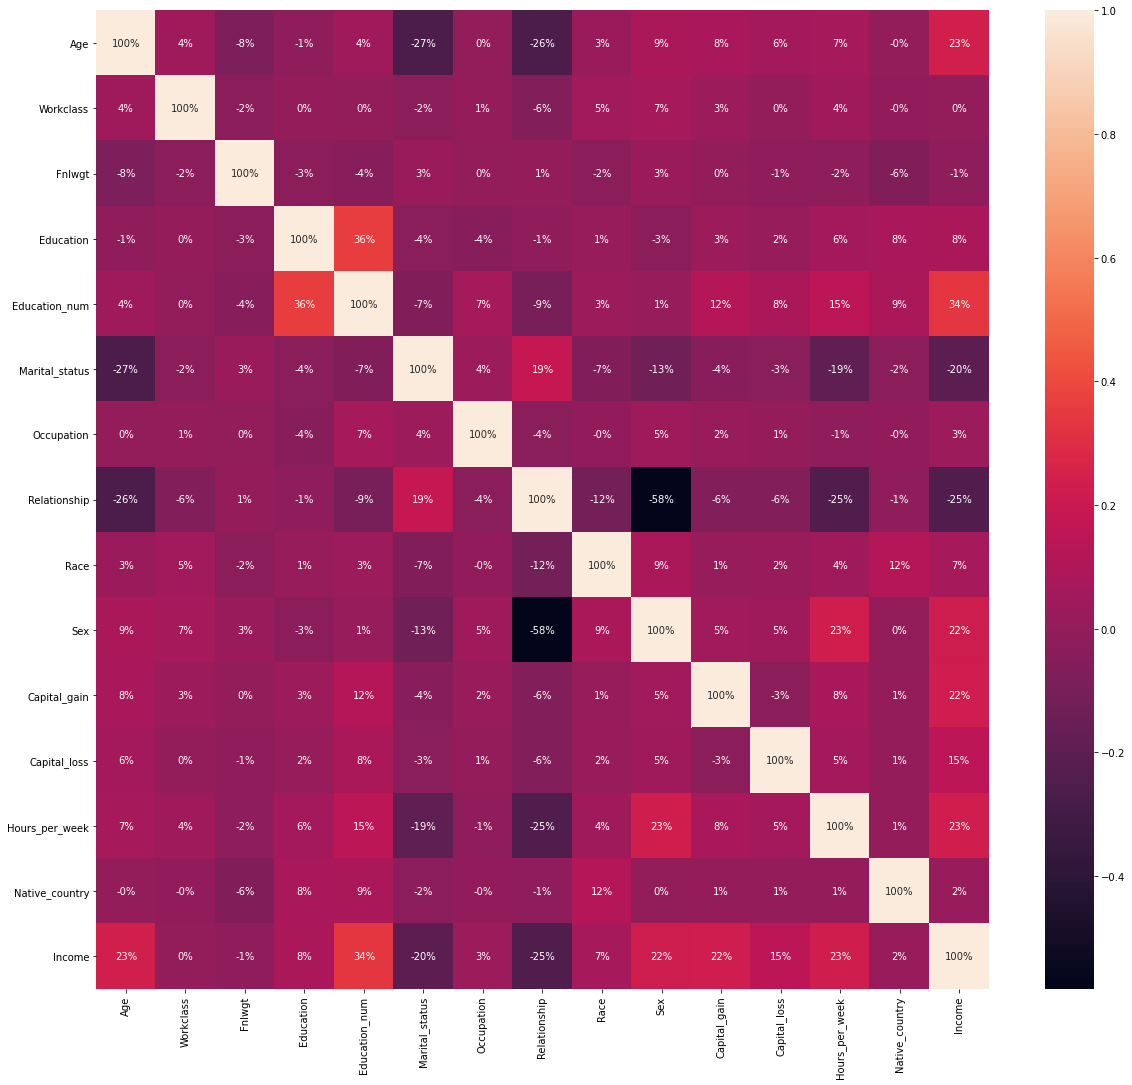

In [75]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

Observations: Income is highest positively correlated to Education_num. Also with Age, capital_gain, capital_loss and Hours_per_week.

Age                   AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Workclass          AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Fnlwgt             AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Education          AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Education_num      AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
Marital_status     AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Occupation         AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
Relationship       AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
Race                 AxesSubplot(0.125,0.518913;0.0824468x0.16413)
Sex               AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
Capital_gain      AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
Capital_loss      AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
Hours_per_week    AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
Native_country    AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
Income            AxesSubplot(0.718617,0.518913;0.0824468x0.16

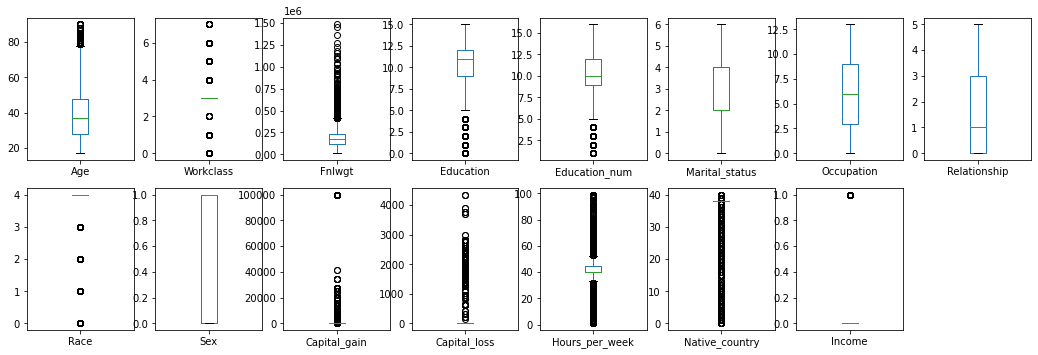

In [76]:
#Checking for the Outliers

df.plot(kind= 'box', subplots= True, layout= (4,8), figsize=(18,12))

Observations: Outliers are present in columns such as Capital_gain, capital_loss, Hours_per_week etc.

In [77]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
df_new= df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [78]:
df_new.shape

(27770, 15)

In [79]:
df.shape

(32560, 15)

In [80]:
df= df_new

In [81]:
#Splitting DATA

x= df.drop('Income', axis=1)
y= df[['Income']]
print(x.shape)
print(y.shape)

(27770, 14)
(27770, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000131023AA0A0>,
      dtype=object)

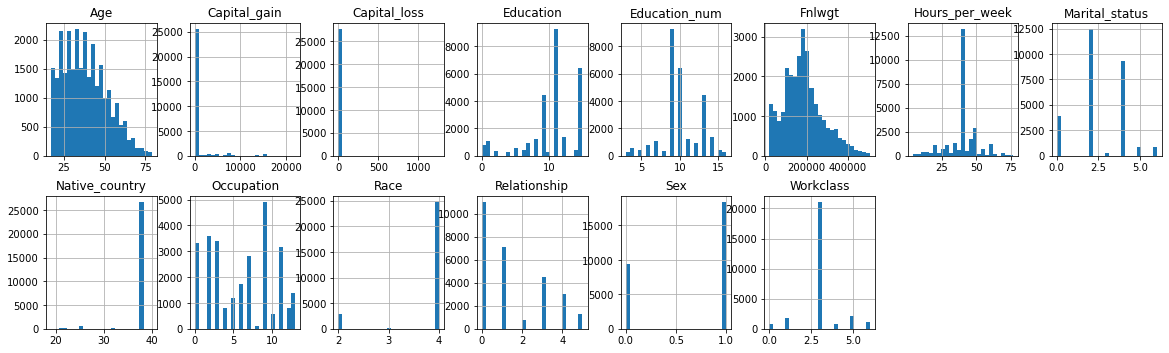

In [82]:
x.hist(figsize=(20,12), layout= (4,8), grid= True, bins=25)

Observations: We can see that column Fnlwgt having somewhat left skewed data.

In [83]:
x.skew()

Age                0.484817
Workclass          0.081968
Fnlwgt             0.627985
Education         -0.955755
Education_num     -0.146274
Marital_status    -0.045645
Occupation         0.013770
Relationship       0.753668
Race              -2.587044
Sex               -0.688946
Capital_gain       4.930671
Capital_loss      29.514547
Hours_per_week    -0.359841
Native_country    -5.405657
dtype: float64

In [84]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
for i in x.columns:
    if x[i].skew()>0.5:
        x[i] = np.log(1+df[i])
x.skew()

Age                0.484817
Workclass          0.081968
Fnlwgt            -0.956596
Education         -0.955755
Education_num     -0.146274
Marital_status    -0.045645
Occupation         0.013770
Relationship       0.255862
Race              -2.587044
Sex               -0.688946
Capital_gain       3.112443
Capital_loss      25.007136
Hours_per_week    -0.359841
Native_country    -5.405657
dtype: float64

In [85]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,11.330348,9,13,2,3,0.000000,4,1,0.000000,0.0,13,38
1,38,3,12.281398,11,9,0,5,0.693147,4,1,0.000000,0.0,40,38
2,53,3,12.366157,1,7,2,5,0.000000,2,1,0.000000,0.0,40,38
4,37,3,12.558780,12,14,2,3,1.791759,4,0,0.000000,0.0,40,38
5,49,3,11.984103,6,5,3,7,0.693147,2,0,0.000000,0.0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12.458010,7,12,2,12,1.791759,4,0,0.000000,0.0,38,38
32556,40,3,11.947140,11,9,2,6,0.000000,4,1,0.000000,0.0,40,38
32557,58,3,11.931050,11,9,6,0,1.609438,4,0,0.000000,0.0,40,38
32558,22,3,12.213500,11,9,4,0,1.386294,4,1,0.000000,0.0,20,38


In [86]:
y

,Income
0,0
1,0
2,0
4,0
5,0
...,...
32555,0
32556,1
32557,0
32558,0


In [87]:
#Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaledX= scaler.fit_transform(x)
new_x= pd.DataFrame(data=scaledX, columns= x.columns)
x=new_x
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.884444,1.739169,-1.052311,-0.345111,1.212471,-0.404861,-0.776789,-1.067458,0.344864,0.713208,-0.295840,-0.040158,-2.415583,0.188402
1,-0.011436,-0.077214,0.494393,0.171059,-0.440608,-1.721757,-0.276292,0.001121,0.344864,0.713208,-0.295840,-0.040158,0.006512,0.188402
2,1.108414,-0.077214,0.632238,-2.409794,-1.267148,-0.404861,-0.276292,-1.067458,-2.958075,0.713208,-0.295840,-0.040158,0.006512,0.188402
3,-0.086093,-0.077214,0.945503,0.429145,1.625741,-0.404861,-0.776789,1.694779,0.344864,-1.402116,-0.295840,-0.040158,0.006512,0.188402
4,0.809787,-0.077214,0.010899,-1.119368,-2.093687,0.253587,0.224206,0.001121,-2.958075,-1.402116,-0.295840,-0.040158,-2.146462,-6.372002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27765,-0.832660,-0.077214,0.781619,-0.861282,0.799202,-0.404861,1.475449,1.694779,0.344864,-1.402116,-0.295840,-0.040158,-0.172902,0.188402
27766,0.137877,-0.077214,-0.049215,0.171059,-0.440608,-0.404861,-0.026043,-1.067458,0.344864,0.713208,-0.295840,-0.040158,0.006512,0.188402
27767,1.481698,-0.077214,-0.075382,0.171059,-0.440608,2.228930,-1.527535,1.413706,0.344864,-1.402116,-0.295840,-0.040158,0.006512,0.188402
27768,-1.205944,-0.077214,0.383970,0.171059,-0.440608,0.912034,-1.527535,1.069700,0.344864,0.713208,-0.295840,-0.040158,-1.787633,0.188402


In [88]:
#Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import joblib
import warnings
warnings.filterwarnings('ignore')

In [89]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=i)
    lg= LogisticRegression()
    lg.fit(x_train, y_train)
    pred_lg= lg.predict(x_test)
    acc= accuracy_score(y_test, pred_lg)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.8401152322650343
671


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3, random_state=243)

In [91]:
x_train.shape

(19439, 14)

In [92]:
x_test.shape

(8331, 14)

In [93]:
lg= LogisticRegression()
gnb= GaussianNB()
svc= SVC()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
rf= RandomForestClassifier()
ad= AdaBoostClassifier()
xgb= XGBClassifier()

models= [lg, gnb, svc, knn, dtc, rf,ad, xgb ]

for m in models:
    m.fit(x_train, y_train)
    predict= m.predict(x_test)
    print(m, 'Acuracy score -')
    print(accuracy_score(y_test, predict))
    print()

LogisticRegression() Acuracy score -
0.8317128796062898

GaussianNB() Acuracy score -
0.7511703276917537

SVC() Acuracy score -
0.8471972152202617

KNeighborsClassifier() Acuracy score -
0.8331532829192174

DecisionTreeClassifier() Acuracy score -
0.8077061577241628

RandomForestClassifier() Acuracy score -
0.8512783579402232

AdaBoostClassifier() Acuracy score -
0.8588404753330933

[16:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child

In [94]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_m= cross_val_score(m, x,y, cv=5)
    print('CV score of ',m,  scr_m.mean())
    print()
    print()

CV score of  LogisticRegression() 0.8281238746849118


CV score of  GaussianNB() 0.7588404753330933


CV score of  SVC() 0.8462009362621534


CV score of  KNeighborsClassifier() 0.8288440763413757


CV score of  DecisionTreeClassifier() 0.803024846957148


CV score of  RandomForestClassifier() 0.8513503781058696


CV score of  AdaBoostClassifier() 0.8586244148361543


[16:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:01

Observations: From above we can observe that for KNeighborsClassifier model there is less difference in accuracy_score and cross validation accuracy_score so we will select KNeighborsClassifier model for final predictions.

In [95]:
#Hyperparameter Tuning for Best selected model KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

parameters= {'n_neighbors': [4,5,8],
    'algorithm': ['auto', 'ball_tree'],
    'p': [1, 2],
    "weights": ['uniform', 'distance']}

GSV= GridSearchCV(knn, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'algorithm': 'auto', 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}

In [96]:
GCV_pred= GSV.best_estimator_.predict(x_test)
print('accuracy_score - ', accuracy_score(y_test, GCV_pred))
print(confusion_matrix(y_test, GCV_pred))
print(classification_report(y_test, GCV_pred))

accuracy_score -  0.8413155683591406
[[6059  464]
 [ 858  950]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6523
           1       0.67      0.53      0.59      1808

    accuracy                           0.84      8331
   macro avg       0.77      0.73      0.75      8331
weighted avg       0.83      0.84      0.83      8331



In [97]:
# Plotting AUC-ROC curve for best model- KNeighborsClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [98]:
y_pred_prob= GSV.best_estimator_.predict_proba(x_test)[:,1]
y_pred_prob

array([0.125, 0.875, 0.625, ..., 0.   , 0.   , 0.   ])

In [99]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

In [100]:
fpr

array([0.        , 0.00505902, 0.0205427 , 0.041392  , 0.07113291,
       0.11482447, 0.17875211, 0.26766825, 0.42020543, 1.        ])

In [101]:
tpr

array([0.        , 0.09513274, 0.23451327, 0.37997788, 0.52544248,
       0.66039823, 0.77378319, 0.87057522, 0.94413717, 1.        ])

In [102]:
thresholds

array([2.   , 1.   , 0.875, 0.75 , 0.625, 0.5  , 0.375, 0.25 , 0.125,
       0.   ])

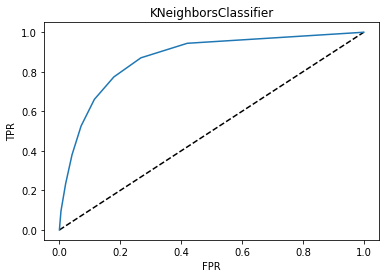

In [103]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'KNeighborsClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('KNeighborsClassifier')
plt.show()

Observations: We can observe that A plot of the ROC Curve confirms the AUC interpretation of a best model for most probability thresholds.

In [104]:
print(roc_auc_score(y_test, GSV.best_estimator_.predict(x_test)))

0.7271547817864359


In [105]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'Census_Income_Project_best_KNN_model.obj')

['Census_Income_Project_best_KNN_model.obj']

Conclusion: For Analysis of Census Income we have selected KNeighborsClassifier model which having accuracy of almost 84%.